<center>

#<b>CS353 ML Lab MidSem</b>

## Name: K V Sumanth Reddy
## Roll No: 181CO225
### Batch: Section-2
### Date: 09/03/2021
---
###Q: Build a K-nearest neighbor algorithm to predict whether a patient is having cancer (Malignant tumor) or not (Benign tumor). Use Kaggle dataset from UCI Machine Learning Repository.
---
####<b>Dataset Used:</b> Breast Cancer Wisconsin (Diagnostic) Data Set (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)
</center>

##Importing Libraries and Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,explained_variance_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
dataset = pd.read_csv('data.csv')

#printing 5 sample tuples
dataset.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
312,89382602,B,12.76,13.37,82.29,504.1,0.08794,0.07948,0.040520,0.025480,0.1601,0.06140,0.3265,0.6594,2.346,25.18,0.006494,0.027680,0.031370,0.010690,0.01731,0.004392,14.19,16.40,92.04,618.8,0.1194,0.22080,0.176900,0.08411,0.2564,0.08253,NaN
200,877501,B,12.23,19.56,78.54,461.0,0.09586,0.08087,0.041870,0.041070,0.1979,0.06013,0.3534,1.3260,2.308,27.24,0.007514,0.017790,0.014010,0.011400,0.01503,0.003338,14.44,28.36,92.15,638.4,0.1429,0.20420,0.137700,0.10800,0.2668,0.08174,NaN
10,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.033230,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.011010,0.007591,0.01460,0.003042,19.19,33.88,123.80,1150.0,0.1181,0.15510,0.145900,0.09975,0.2948,0.08452,NaN
526,91813701,B,13.46,18.75,87.44,551.1,0.10750,0.11380,0.042010,0.031520,0.1723,0.06317,0.1998,0.6068,1.443,16.07,0.004413,0.014430,0.015090,0.007369,0.01354,0.001787,15.35,25.16,101.90,719.8,0.1624,0.31240,0.265400,0.14270,0.3518,0.08665,NaN
333,897137,B,11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,0.2144,0.9961,1.529,15.07,0.005617,0.007124,0.000974,0.002941,0.01700,0.002030,12.76,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##Data Preprocessing

In [ ]:
# Drop unused columns and encoding M to 0 and B to 1
columns = ['Unnamed: 32', 'id', 'diagnosis']
data = {'M': 0, 'B': 1}

y = dataset['diagnosis'].map(data)
x = dataset.drop(columns, axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 99)

print('Training dataset size:\nx_train -', len(x_train), '\ny_train -', len(y_train), '\n')
print('Testing dataset size:\nx_test -', len(x_test), '\ny_test -', len(y_test))

Training dataset size:
x_train - 455 
y_train - 455 

Testing dataset size:
x_test - 114 
y_test - 114


In [ ]:
KNN = []
for i in range(1, 8):
  KNNModel = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
  KNN.append(KNNModel)

In [ ]:
for i in range(7):
  KNN[i].fit(x_train, y_train) 

##Finding Accuracies for all models using the test dataset

In [ ]:
train_accuracyKNN = []    #store training accuracies
test_accuracyKNN = []     #store testing accuracies

for i in range(7):
  print("--------------------------------")
  print('K = {}'.format(i + 1))
  train_accuracyKNN.append(KNN[i].score(x_train, y_train))
  test_accuracyKNN.append(KNN[i].score(x_test, y_test))
  y_pred = KNN[i].predict(x_test)

  print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("\nAccuracy: %.2f" %(accuracy_score(y_test, y_pred)*100))
  print("Mean Squared Error: %.2f" %(mean_squared_error(y_test, y_pred)*100))
  print("Explained Variance: %.2f" %(explained_variance_score(y_test, y_pred)*100))
  print("R2 Score: %.2f" %(r2_score(y_test, y_pred)*100))
  print("\n\n")
  print("--------------------------------")

--------------------------------
K = 1
Confusion Matrix:
 [[34  4]
 [ 4 72]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.95      0.95      0.95        76

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Accuracy: 92.98
Mean Squared Error: 7.02
Explained Variance: 68.42
R2 Score: 68.42



--------------------------------
--------------------------------
K = 2
Confusion Matrix:
 [[35  3]
 [ 7 69]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        38
           1       0.96      0.91      0.93        76

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.92      0.91      0.91       114


Accuracy: 91.23
Mean Squared Error: 8.77
Explained Variance: 61.08
R2 S

Best accuracy is at neighbours = 7 and the best mean difference between train and test accuracies is at neighbours = 3,5,6

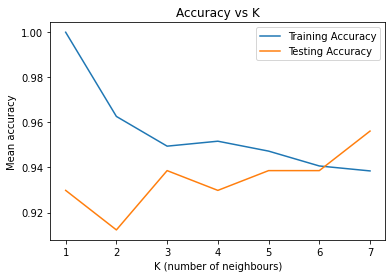

In [ ]:
fig = plt.figure()
ax = plt.axes()
plt.plot([1,2,3,4,5,6,7], train_accuracyKNN, label = 'Training Accuracy')
plt.plot([1,2,3,4,5,6,7], test_accuracyKNN, label = 'Testing Accuracy')
plt.xlabel('K (number of neighbours)')
plt.ylabel('Mean accuracy')
plt.title('Accuracy vs K')
plt.legend()
plt.savefig('Graph.png')
plt.show()